In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

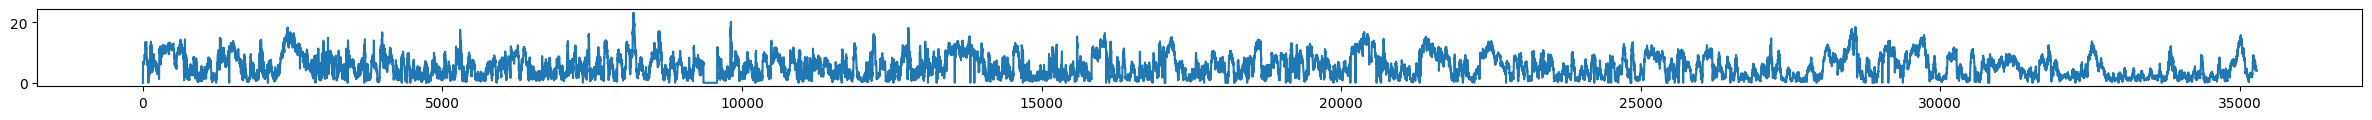

In [2]:
#一号风机的风速
df = pd.read_csv('turb1.csv')
wspd = df['Wspd'].fillna(0).to_numpy().reshape(-1)
plt.figure(figsize=(30,1))
plt.plot(wspd)
plt.show()

In [9]:
import random
def select():
    # 总数和需要生成的随机数数量
    total_indices = 73
    num_selected = 32

    # 主要部分的范围和数量
    main_range = range(1, 21)  # 0到20的范围
    main_percentage = 0.5      # 主要部分占80%

    # 计算每部分的数量
    num_main = int(num_selected * main_percentage)
    num_rest = num_selected - num_main

    # 生成主要部分的随机索引
    main_indices = random.sample(main_range, num_main)

    # 生成剩余部分的随机索引（确保不与主要部分重叠）
    rest_indices = random.sample(range(total_indices), num_rest)

    # 合并并打乱索引
    selected_indices = main_indices + rest_indices + [0]
    random.shuffle(selected_indices)

    return selected_indices


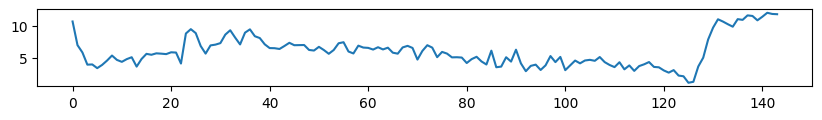

(73,)
(73,)
[56, 15, 26, 7, 17, 1, 3, 2, 5, 9, 18, 11, 4, 10, 0, 48, 15, 29, 7, 12, 19, 66, 36, 35, 16, 3, 1, 67, 14, 28, 12, 72, 5]


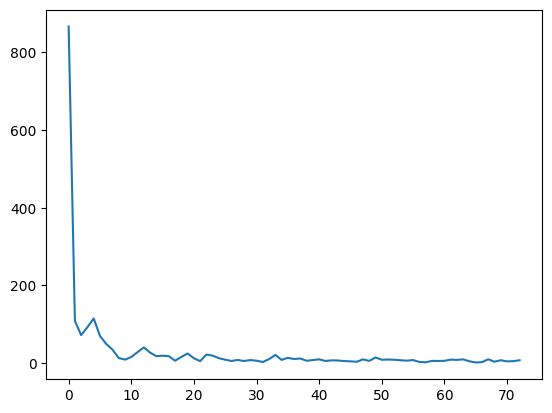

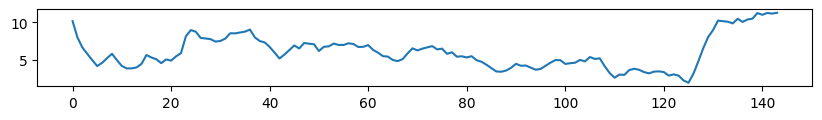

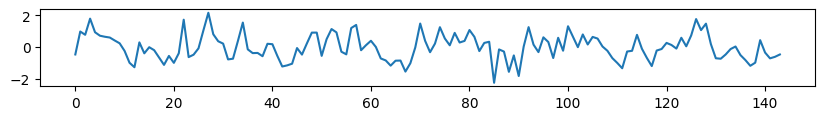

In [10]:
plt.figure(figsize=(10,1))
plt.plot(wspd[144:288])
plt.show()
wspd_fft = np.fft.rfft(wspd[144:288])
freq = np.fft.rfftfreq(144)
print(freq.shape)
print(wspd_fft.shape)
plt.plot(np.abs(wspd_fft))
index = np.argsort(np.abs(wspd_fft))[::-1]
selected_freq = select()
print(selected_freq)
#selected_freq = index[:1]
#print(wspd_fft[1])
# wspd_fft[0] = 0
freq_domain = np.zeros_like(wspd_fft)
freq_domain[selected_freq] = wspd_fft[selected_freq]

trans = np.fft.irfft(freq_domain)
plt.figure(figsize=(10,1))
plt.plot(trans)

redisual = trans - wspd[144:288]
plt.figure(figsize=(10,1))
plt.plot(redisual)
plt.show()

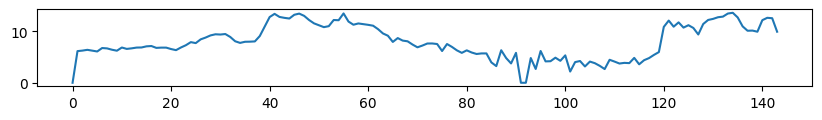

(73,)
(73,)


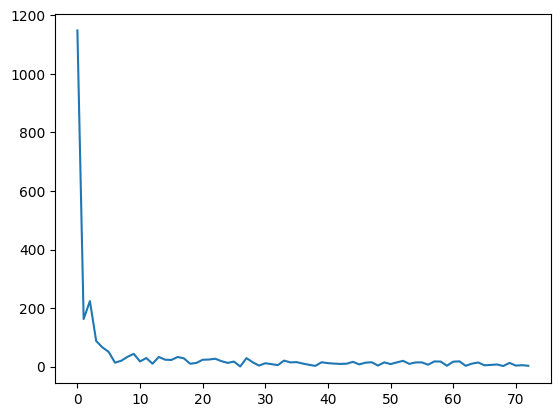

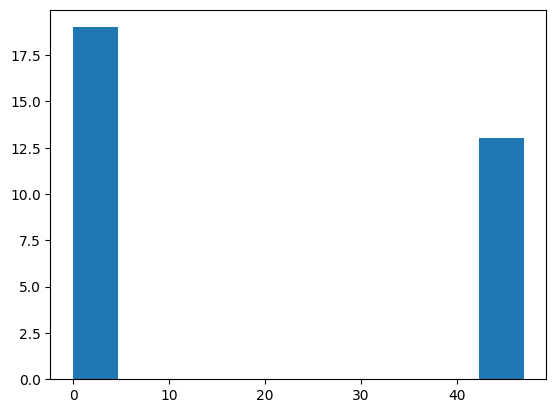

[ 0 47 47 47  0 47  0  0  0 47  0 47  0  0  0  0 47  0 47 47  0 47  0  0
  0 47  0  0  0 47  0 47]
(1148.2199999999998+0j)


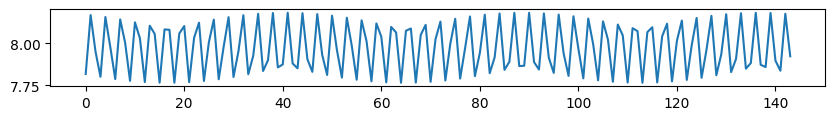

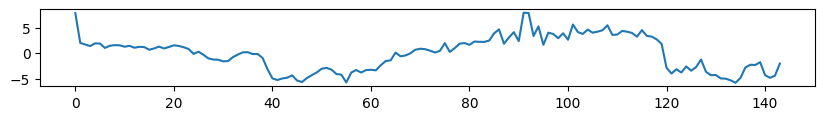

In [43]:
plt.figure(figsize=(10,1))
plt.plot(wspd[0:144])
plt.show()
wspd_fft = np.fft.rfft(wspd[0:144])
freq = np.fft.rfftfreq(144)
print(freq.shape)
print(wspd_fft.shape)
plt.plot(np.abs(wspd_fft))
plt.show()
index = np.argsort(np.abs(wspd_fft))[::-1]
#selected_freq = index[:2]
selected_freq  = np.array(np.abs(np.floor(np.random.normal(0,0.01,32) * 144//3) % 144//3),dtype=np.int32)
plt.hist(selected_freq)
plt.show()
print(selected_freq)
print(wspd_fft[0])
freq_domain = np.zeros_like(wspd_fft)
freq_domain[selected_freq] = wspd_fft[selected_freq]

trans = np.fft.irfft(freq_domain)
plt.figure(figsize=(10,1))
plt.plot(trans)

redisual = trans - wspd[0:144]
plt.figure(figsize=(10,1))
plt.plot(redisual)
plt.show()

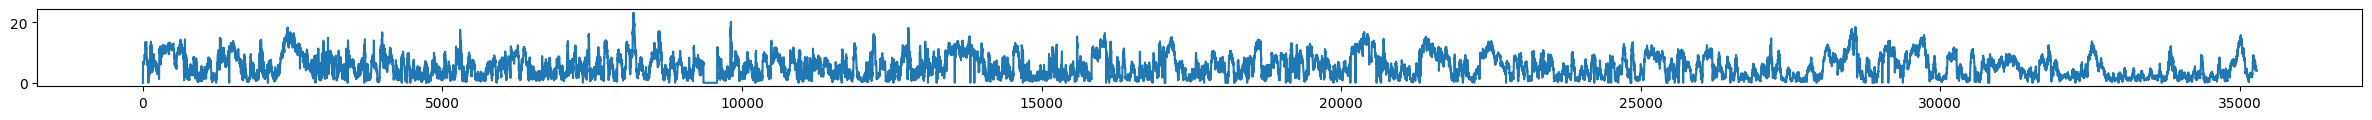

(35280,)
(35280,)


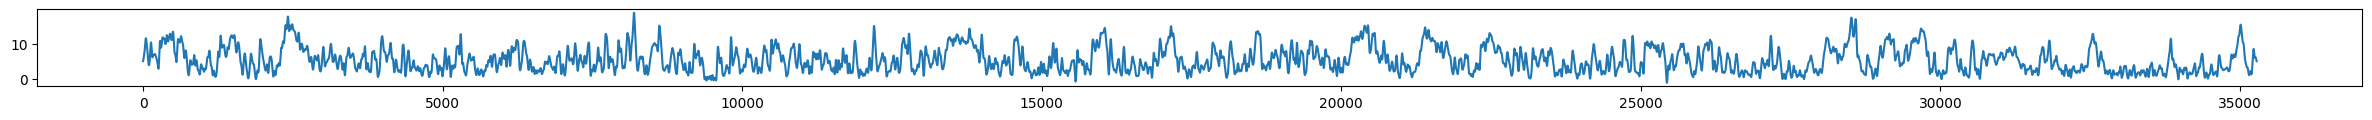

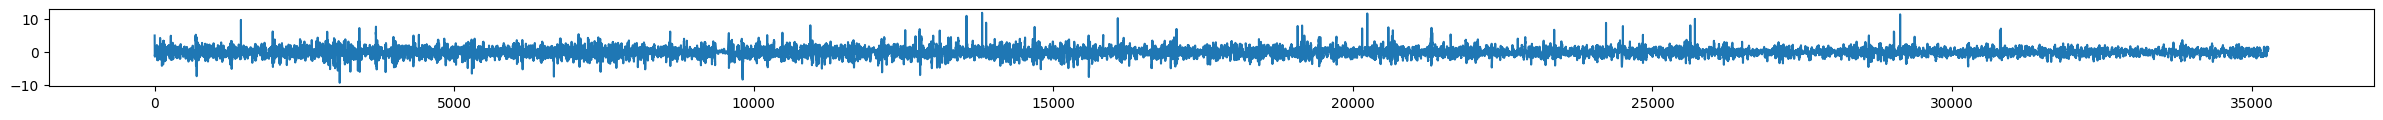

0.9119349329974655
3098
35280


In [62]:
plt.figure(figsize=(30,1))
plt.plot(wspd)
plt.show()
wspd_fft = np.fft.fft(wspd)
freq = np.fft.fftfreq(len(wspd))
print(freq.shape)
print(wspd_fft.shape)
#plt.plot(freq,np.abs(wspd_fft))
index = np.argsort(np.abs(wspd_fft))[::-1]
selected_freq = index[:1000]
freq_domain = np.zeros_like(wspd_fft)
freq_domain[selected_freq] = wspd_fft[selected_freq]

trans = np.real(np.fft.ifft(freq_domain))
plt.figure(figsize=(30,1))
plt.plot(trans)

redisual = trans - wspd
plt.figure(figsize=(30,1))
plt.plot(redisual)
plt.show()
print(np.abs(redisual).mean())
print(np.sum(np.abs(redisual) > 2))
print(len(wspd))

[0.03020411 0.10185434 0.00382781 0.1320516  0.00243984 0.01343587
 0.05965178 0.06239192 0.08564828 0.10368804 0.03487234 0.1433042
 0.09127877 0.02056197 0.17679088 0.02543708 0.12462741 0.01976696
 0.14493787 0.01316048 0.15351248 0.04586672 0.11989562 0.00831914
 0.02112899 0.01127648 0.21095295 0.10704713 0.08843382 0.00120875
 0.11267129 0.08613836]


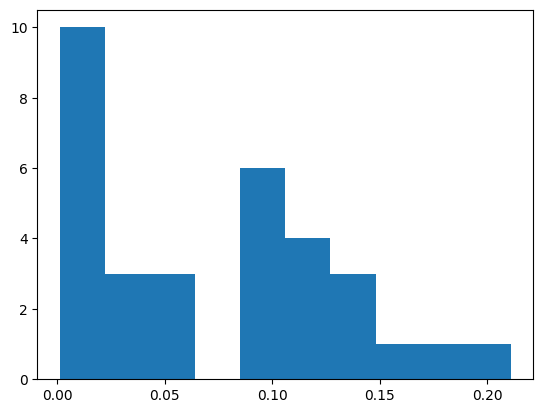

In [39]:
import numpy as np
vals = np.random.normal(0,0.1,32)
vals = np.abs(vals)
print(vals)
plt.hist(vals)
plt.show()